# Telco of Tomorrow
<hr style="border-top:10px groove CadetBlue; margin-top: 2px; margin-bottom: 2px">

<img style="float: left;" src="TelcoCo.png" alt="Telco" width="250"/>

<hr style="border-top:10px groove CadetBlue; margin-top: 2px; margin-bottom: 2px">

In [1]:
# To get rid of those blocks of red warnings
import warnings
warnings.filterwarnings("ignore")

# Standard Imports
import numpy as np
import pandas as pd
import os
import math
from scipy import stats

# Modeling Imports
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

# Vis Imports
import matplotlib.pyplot as plt
import seaborn as sns

# Custom Module Imports
import acquire
import prepare
import model
import explore

<hr style="border-top:10px groove CadetBlue; margin-top: 2px; margin-bottom: 2px">

## Acquire Data



<hr style="border-top:10px groove CadetBlue; margin-top: 2px; margin-bottom: 2px">

In [2]:
# Reading the Telco data into a DataFrame
telco_df = acquire.get_telco_data()

In [3]:
telco_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 28 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   internet_service_type_id  7043 non-null   int64  
 1   customer_id               7043 non-null   object 
 2   contract_type_id          7043 non-null   int64  
 3   gender                    7043 non-null   object 
 4   senior_citizen            7043 non-null   int64  
 5   partner                   7043 non-null   object 
 6   dependents                7043 non-null   object 
 7   tenure                    7043 non-null   int64  
 8   phone_service             7043 non-null   object 
 9   multiple_lines            7043 non-null   object 
 10  online_security           7043 non-null   object 
 11  online_backup             7043 non-null   object 
 12  device_protection         7043 non-null   object 
 13  tech_support              7043 non-null   object 
 14  streamin

### Acquire Takeaways
- The function from acquire is pulling the data from the Codeup database via a sql query and creating a local csv file
- The inital data has 7043 rows and 28 columns.

<hr style="border-top:10px groove CadetBlue; margin-top: 2px; margin-bottom: 2px">

## Prepare Data

<hr style="border-top:10px groove CadetBlue; margin-top: 2px; margin-bottom: 2px">

In [4]:
# Preparing the data for exploration
telco_df = prepare.prep_telco(telco_df)


In [5]:
telco_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 26 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   customer_id                        7043 non-null   object 
 1   senior_citizen                     7043 non-null   int64  
 2   partner                            7043 non-null   int64  
 3   dependents                         7043 non-null   int64  
 4   tenure                             7043 non-null   int64  
 5   phone_service                      7043 non-null   int64  
 6   multiple_lines                     7043 non-null   object 
 7   online_security                    7043 non-null   object 
 8   online_backup                      7043 non-null   object 
 9   device_protection                  7043 non-null   object 
 10  tech_support                       7043 non-null   object 
 11  streaming_tv                       7043 non-null   objec

In [6]:
# Splitting the data into the train, validate, and test sets.
train_telco, validate_telco, test_telco = prepare.split_data_telco(telco_df)


In [7]:
print(f'train -> {train_telco.shape}')
print(f'validate -> {validate_telco.shape}')
print(f'test -> {test_telco.shape}')

train -> (4225, 26)
validate -> (1409, 26)
test -> (1409, 26)


### Prepare Takeaways
- We are down to 26 columns after droping/adding some.
- No null values, and necessary column object types have been converted to int or float.
- The split for the data was 60% train, 20% validate, and 20% test.

<hr style="border-top:10px groove CadetBlue; margin-top: 2px; margin-bottom: 2px">

## Explore Data

<hr style="border-top:10px groove CadetBlue; margin-top: 2px; margin-bottom: 2px">

### Where are the correlations in the data?

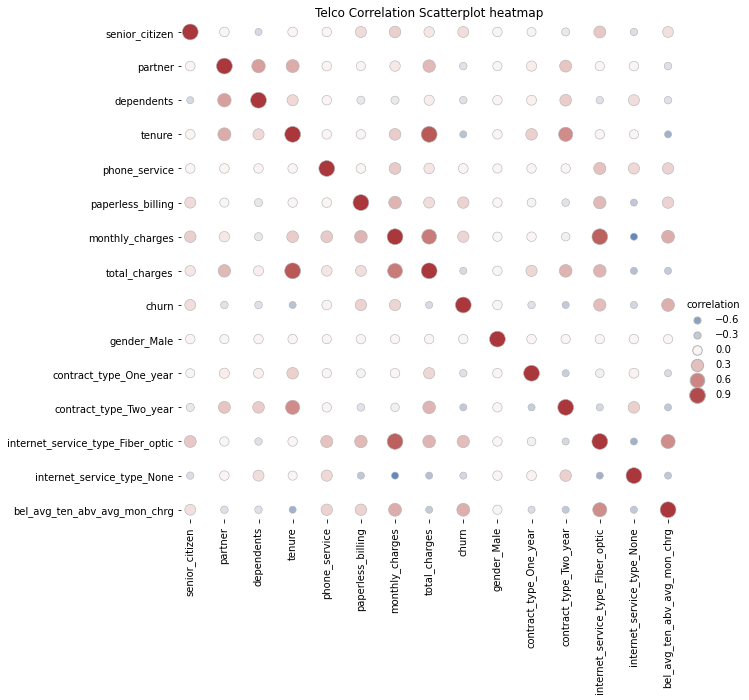

In [8]:
# Making a correlation dataframe
train_telco_corr = train_telco.corr().stack().reset_index(name="correlation")

# Plotting the dataframe
g = sns.relplot(
    data=train_telco_corr,
    x="level_0", y="level_1", hue="correlation", size="correlation",
    palette="vlag", hue_norm=(-1, 1), edgecolor=".7",
    height=10, sizes=(50, 250), size_norm=(-.2, .8))

# Setting the Lables
g.set(xlabel="", ylabel="", title='Telco Correlation Scatterplot heatmap', aspect="equal")
g.despine(left=True, bottom=True)
g.ax.margins(.02)

# Rotating the x axis 90 degrees to clean it up
for label in g.ax.get_xticklabels():
    label.set_rotation(90)

# Making the legends edge color match the data points
for artist in g.legend.legendHandles:
    artist.set_edgecolor(".7")

### Scatterplot Heatmap Takeaways
- Tenure and total charges have a positive correlation.
- Tenure and two year contracts have a positive correlation.
- Monthly charges and fiber optic have a high correlation.
- Churn has a positive correlation with monthly charges, papperless billing, fiber optic, phone service, senior citizen, and those who are above the average monthly charges and below the average tenure.
- Those who are above the average monthly charges and below the average tenure and Fiber Optic have a positive correlation.

### Is there a relationship between Churn and Contract Type?

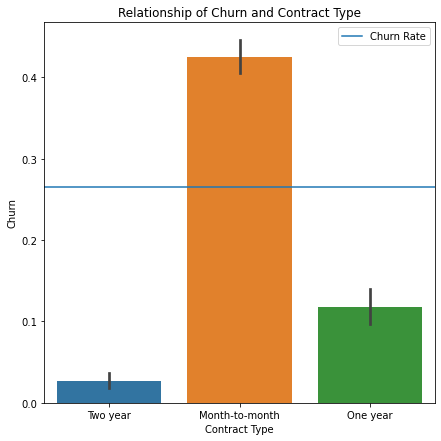

In [9]:
# Increasing the figure size and setting the title
plt.figure(figsize = (7, 7))
plt.title('Relationship of Churn and Contract Type')

# Plotting the bar plot
sns.barplot(x='contract_type', y='churn', data=train_telco)

# Setting the variable for the average churn
churn_rate = train_telco.churn.mean()

# Plotting the average churn line
plt.axhline(churn_rate, label='Churn Rate')

# Setting the x and y labels, and setting the legend
plt.xlabel('Contract Type')
plt.ylabel('Churn')
plt.legend()
plt.show()

### Bar Plot Takeaways
- One and Two year contracts have a much lower rate of churn compared to month-to-month contracts.

____

### Stats Test for Bar Plot (Chi Square Test)
- $H_0$:Contract Type and churn are independent
- $H_a$:There is a relationship between churn and Contract Type
- Alpha = 0.05

In [10]:
# Setting the alpha
alpha = 0.05

# Setting the null and alternative hypothesis
null_hyp = 'Contract Type and churn are independent'
alt_hyp = 'There is a relationship between churn and Contract Type'

# Making the observed dataframe
observed = pd.crosstab(train_telco.churn, train_telco.contract_type)

# Running the chi square test and running a if statement for the null hypothesis to be rejected or failed to reject
chi2, p, degf, expected = stats.chi2_contingency(observed)
if p < alpha:
    print('We reject the null hypothesis that', null_hyp)
    print(alt_hyp)
else:
    print('We fail to reject the null hypothesis that', null_hyp)
    print('There appears to be no relationship between churn and Contract Type')

print('P-Value', p)
print('Chi2', round(chi2, 2))
print('Degrees of Freedom', degf)

We reject the null hypothesis that Contract Type and churn are independent
There is a relationship between churn and Contract Type
P-Value 3.2053427834370596e-153
Chi2 702.26
Degrees of Freedom 2


### Stats Test Takeaways
- There is in fact a relationship between the Churn and Contract Type.

___

### Bar Plot and Stats Test (Chi Square Test)

##### First Plot Null and Alt Hypothesis
- $H_0$:Phone Service and churn are independent
- $H_a$:There is a relationship between churn and Phone Service
- Alpha = 0.05

##### Second Plot Null and Alt Hypothesis
- $H_0$:Females who have Phone Service and churn are independent
- $H_a$:There is a relationship between churn and Females with Phone Service
- Alpha = 0.05 

### Is there a relationship between churn and phone service?

### If not is there a relationship with females who churn with phone service?

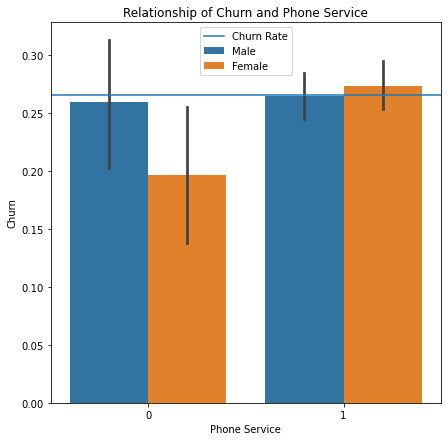

We fail to reject the null hypothesis that Phone Service and churn are independent
There appears to be no relationship between churn and Phone Service
P-Value 0.11104986402814591
Chi2 2.54
Degrees of Freedom 1


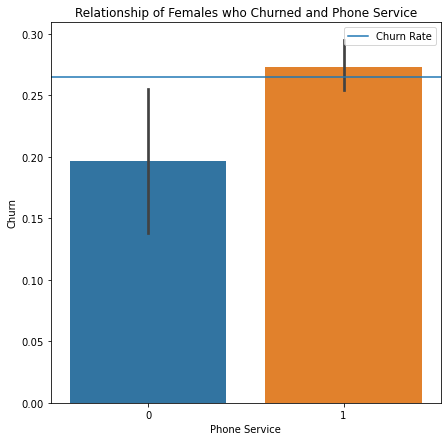

We reject the null hypothesis that Females who have Phone Service and churn are independent
There is a relationship between churn and Females with Phone Service
P-Value 0.0298505787547087
Chi2 4.72
Degrees of Freedom 1


In [11]:
# Importing a custom function from explore.py
explore.bar_plot(train_telco)

### Bar Plot and Stats Test Takeaways

##### Relationship of Churn and Phone Service
- We fail to reject the null hypothesis that Phone Service and churn are independent.
- There appears to be no relationship between churn and Phone Service.
- P-Value 0.11104986402814591
- Chi2 2.54
- Degrees of Freedom 1

##### Relationship of Females who Churned and Phone Service
- We reject the null hypothesis that Females who have Phone Service and churn are independent.
- There is a relationship between churn and Females with Phone Service.
- P-Value 0.0298505787547087
- Chi2 4.72
- Degrees of Freedom 1

### Scatter Plot and Stats Test (Chi Square Test)

- $H_0$:People who are above the Avg Monthly Charge and Below the Avg Tenure are independent with churn
- $H_a$:There is a relationship between churn and people who are above the Avg Monthly Charge and Below the Avg Tenure
- Alpha = 0.05

### Is there a relationship between people who are above the averge monthly charge and below the average tenure and churn?

In [12]:
# Making a new column so the upcoming legend makes sense
train_telco['churn_str'] = train_telco.churn.replace(0, 'No Churn')
train_telco.churn_str = train_telco.churn_str.replace(1, 'Churn')

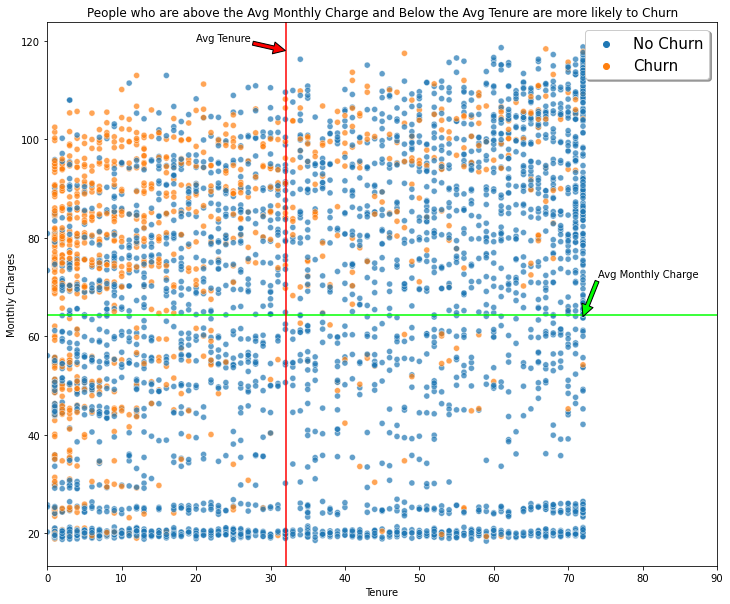

We reject the null hypothesis that People who are above the Avg Monthly Charge and Below the Avg Tenure are independent with churn
There is a relationship between churn and people who are above the Avg Monthly Charge and Below the Avg Tenure
P-Value 5.788583939458989e-132
Chi2 597.52
Degrees of Freedom 1


In [13]:
# Importing a custom function from explore.py
explore.scatter_plot(train_telco)

### Scatter Plot and Stats Test Takeaways
- A large portion of churn occurs in the upper left quadrant of the graph where people are below average tenure and above the average monthly charge.
- We reject the null hypothesis that People who are above the Avg Monthly Charge and Below the Avg Tenure are independent with churn.
- There is a relationship between churn and people who are above the Avg Monthly Charge and Below the Avg Tenure.
- P-Value 5.788583939458989e-132
- Chi2 597.52
- Degrees of Freedom 1

## Explore Takeaways
- The new column I made for people above the Avg Monthly Charge and Below the Avg Tenure seems to be a good column to use in the modeling phase.
- Most of the numeric columns will be used for the modeling phase.

<hr style="border-top:10px groove CadetBlue; margin-top: 2px; margin-bottom: 2px">

## Model and Evaluate


<hr style="border-top:10px groove CadetBlue; margin-top: 2px; margin-bottom: 2px">

### Baseline Accuracy
- If no for churn is set for every observation, the baseline accuracy is 73%.
- My goal is to find features that will give me a higher accuracy then this.

In [14]:
# Finding the baseline accuracy
print('Baseline Accuracy', round(accuracy_score(train_telco.churn, train_telco.baseline), 2)* 100,'%')

Baseline Accuracy 73.0 %


___

### Define X and y train, val, and test datasets.

In [15]:
# Setting the features to be used in the models to a variable.
X_cols = ['bel_avg_ten_abv_avg_mon_chrg', 'internet_service_type_None', 'internet_service_type_Fiber_optic', 'contract_type_Two_year', 'contract_type_One_year', 
          'gender_Male', 'monthly_charges', 'paperless_billing', 'tenure', 'dependents', 'partner', 'senior_citizen']


In [16]:
# Creating the X & y version of train, validate, and test where y is a series with just the target variable and X are all the features. 
X_train_telco = train_telco[X_cols]
y_train_telco = train_telco.churn

X_validate_telco = validate_telco[X_cols]
y_validate_telco = validate_telco.churn

X_test_telco = test_telco[X_cols]
y_test_telco = test_telco.churn

## Evaluate Models

### Random Forest

In [17]:
# This function returns/prints the hyperparameters, classification report, and accuracy for the training and validate set
model.rf_scores(X_train_telco, y_train_telco, X_validate_telco, y_validate_telco)

RandomForestClassifier min_samples_leaf=12, max_depth=8, random_state=123
Model stats:
Accuracy: 0.81
True Positive Rate: 0.51
False Positive Rate: 0.08
True Negative Rate: 0.92
Flase Negative Rate: 0.49
Precision: 0.71
Recall: 0.51
f1 score: 0.59
Positive support: 1121
Negative support: 3104
-----------------------------------------
Accuracy of random forest classifier on training set: 0.81
Accuracy of random forest classifier on validate set: 0.80


### KNN

In [18]:
# This function returns/prints the hyperparameters, classification report, and accuracy for the training and validate set
model.knn_scores(X_train_telco, y_train_telco, X_validate_telco, y_validate_telco)

KNeighborsClassifier n_neighbors=15
Model stats:
Accuracy: 0.81
True Positive Rate: 0.51
False Positive Rate: 0.08
True Negative Rate: 0.92
Flase Negative Rate: 0.49
Precision: 0.69
Recall: 0.51
f1 score: 0.58
Positive support: 1121
Negative support: 3104
-----------------------------------------
Accuracy of KNN classifier on training set: 0.81
Accuracy of KNN classifier on validate set: 0.79


### Logistic Regression

In [19]:
# This function returns/prints the hyperparameters, classification report, and accuracy for the training and validate set
model.lr_scores(X_train_telco, y_train_telco, X_validate_telco, y_validate_telco)

LogisticRegression C=.01, random_state=123, intercept_scaling=1, solver=lbfgs
Model stats:
Accuracy: 0.80
True Positive Rate: 0.46
False Positive Rate: 0.09
True Negative Rate: 0.91
Flase Negative Rate: 0.54
Precision: 0.66
Recall: 0.46
f1 score: 0.55
Positive support: 1121
Negative support: 3104
-----------------------------------------
Accuracy of Logistic Regression classifier on training set: 0.80
Accuracy of Logistic Regression classifier on validate set: 0.80


## Models Takeaways
- My Random Forest model was my best with a training accuracy of 81% and a validate accuracy of 80%.
- All 3 of my best models performed similarly in the 79%-81% range.

### Testing the best Model (Random Forest)

In [20]:
# Running the best model(random forest) on the test set
model2 = RandomForestClassifier(min_samples_leaf=12, max_depth=8, random_state=123)
model2.fit(X_test_telco, y_test_telco)
y_pred = model2.predict(X_test_telco)
y_pred_proba = model2.predict_proba(X_train_telco)
predicted_test = model2.predict(X_test_telco)
print('Accuracy of random forest classifier on test set: {:.2f}'.format(model2.score(X_test_telco, y_test_telco)))


Accuracy of random forest classifier on test set: 0.81


<hr style="border-top:10px groove CadetBlue; margin-top: 2px; margin-bottom: 2px">

## Create the Predictions CSV


<hr style="border-top:10px groove CadetBlue; margin-top: 2px; margin-bottom: 2px">

In [21]:
# Setting the variable for the probability of churn or no churn in the test data set
proba_test = model2.predict_proba(X_test_telco)

In [22]:
# Creating a data frame for the proba_test variable
proba_df = pd.DataFrame(proba_test, columns=model2.classes_.tolist())

# Renaming the columns 1 and 0 to churn or no churn
proba_df.rename(columns={0: 'No_Churn'}, inplace=True)
proba_df.rename(columns={1: 'Churn'}, inplace=True)

# Creating another data frame to concat with the proba_df
reset_test = test_telco.reset_index()

# Concatenating the 2 data frames together
test_proba_df = pd.concat([reset_test, proba_df], axis=1)

# Adding the predicted column, this states the prediction for our model
test_proba_df['predicted'] = predicted_test

# Creating the final data frame to export
csv_df = test_proba_df[['customer_id', 'Churn', 'predicted']]
csv_df.head()

,customer_id,Churn,predicted
0,4338-EYCER,0.158960,0
1,7665-VIGUD,0.040518,0
2,3621-CEOVK,0.745799,1
3,6156-UZDLF,0.324549,0
4,1273-MTETI,0.768420,1


In [23]:
# Write DataFrame to a csv file for deliverable.
csv_df.to_csv('predictions.csv')

<hr style="border-top:10px groove CadetBlue; margin-top: 2px; margin-bottom: 2px">

## Conclusions
- There are positive correlations with churn and monthly charges, paperless billing, fiber optic, phone service, senior citizen, and those who are above the average monthly charges and below the average tenure.
- There are negative correlations with churn and tenure, total charges, no internet service, and a two year contract.
- There is a relationship between churn and contract type.
- There was not a relationship between both genders who churn and phone service, however there was a relationship between females who churn and phone service.
- There was a relationship between churn and people who are above the average monthly charge and below the average tenure.

### Idealy we would like to find a way to incentivise more people to sign a one or two year contract as opposed to a month-to-month contract. It would also be benificial to get more people to stay past the average tenure and keep their cost at or below the average monthly charge. 

<hr style="border-top:10px groove CadetBlue; margin-top: 2px; margin-bottom: 2px">

 ## Next Steps
 - If I had more time with the project I would like to explore more combinations of features on my models and I would also implement more feature engineering.
 - I would also like to explore more why females that don't have phone service are less likely to churn.